# Motor current and vibration dataset for various faults in an E-motor-driven centrifugal pump #
Welcome to this notebook. **The same assignment as last time, but now using PCA as a prefilter!**

For a description of the original data see: https://www.sciencedirect.com/science/article/pii/S235234092301017X?via%3Dihub

To download an excel with a more detailed overview of the data: https://github.com/bbozon/DataScience/blob/main/measurement%20overview.xlsx <br>
(click the download button at the right )

I've added a fourier transform of the original data (the data is translated to the frequency domain).
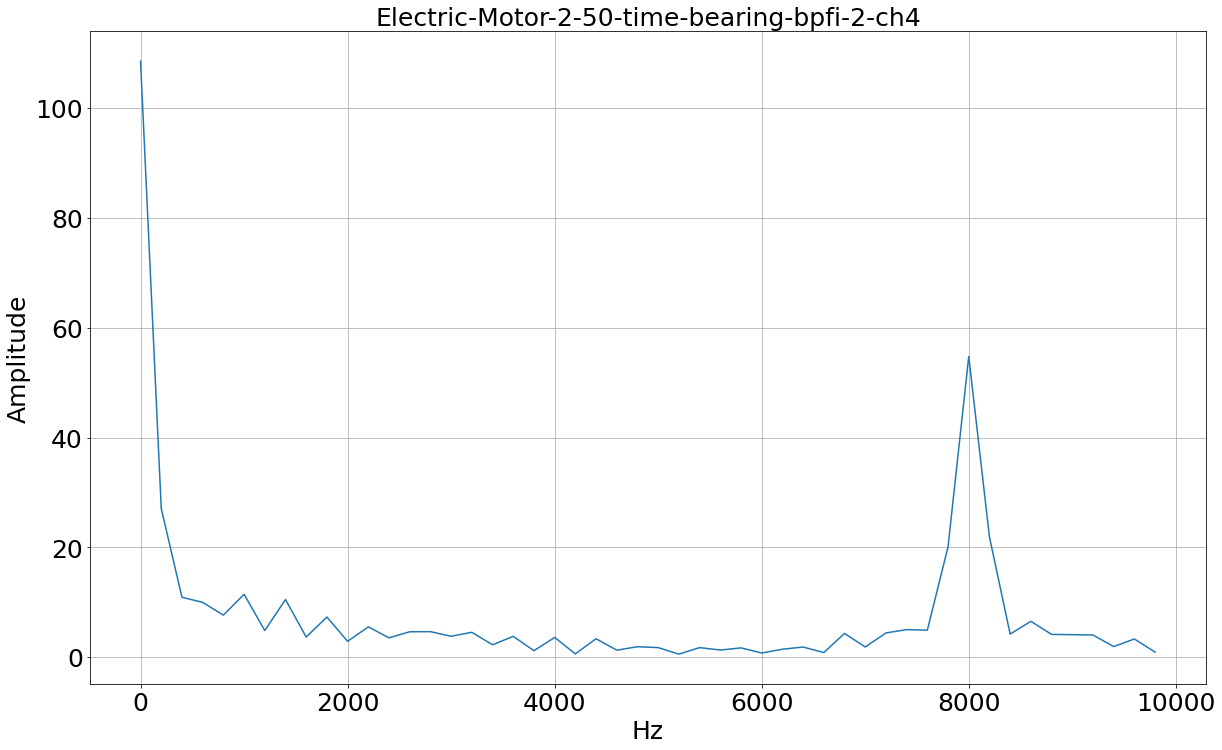

In the example below the frequency data is added as extra columns.

Written by Bart Bozon, please copy & use as you would like.

In [10]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/motor_data_electrical_and_vibration_time_and_frequency.csv'
df = pd.read_csv(url)
df

,num,file_name,motor_type,measurement_type,percentage_rated_speed,failure_mode,channels,0.0 [s],5e-05 [s],0.0001 [s],...,8000.0 [Hz],8200.0 [Hz],8400.0 [Hz],8600.0 [Hz],8800.0 [Hz],9000.0 [Hz],9200.0 [Hz],9400.0 [Hz],9600.0 [Hz],9800.0 [Hz]
0,0,Electric-Motor-2-100-time-bearing-bpfi-1-ch1,2,Electric,100,bearing-bpfi-1,ch1,12.538880,11.504028,11.892352,...,0.460920,0.505890,0.491107,0.478344,0.464159,0.460195,0.455085,0.445983,0.442841,0.444571
1,1,Electric-Motor-2-100-time-bearing-bpfi-1-ch2,2,Electric,100,bearing-bpfi-1,ch2,13.997547,14.728688,14.463031,...,0.281560,0.178401,0.175755,0.158460,0.148352,0.140856,0.131986,0.131468,0.136013,0.136019
2,2,Electric-Motor-2-100-time-bearing-bpfi-1-ch3,2,Electric,100,bearing-bpfi-1,ch3,-25.848821,-25.387859,-25.563526,...,0.486832,0.399209,0.327249,0.328707,0.322791,0.323270,0.323412,0.317095,0.311970,0.311122
3,3,Electric-Motor-2-100-time-bearing-bpfi-1-ch4,2,Electric,100,bearing-bpfi-1,ch4,-126.612758,-54.756134,-44.005587,...,8.222805,12.140835,7.765923,5.993686,4.849380,5.181368,5.188414,4.162534,3.393596,3.880727
4,4,Electric-Motor-2-100-time-bearing-bpfi-1-ch5,2,Electric,100,bearing-bpfi-1,ch5,280.423727,297.966561,280.213054,...,7.933788,2.230050,3.447050,2.596825,2.126454,1.815192,1.717921,1.534892,1.157102,0.935014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,7657,Vibration-Motor-4-70-time-unbalance-pump-3-ch1,4,Vibration,70,unbalance-pump-3,ch1,0.431913,0.030839,0.331461,...,0.097905,0.086127,0.037719,0.082455,0.158598,0.113416,0.132084,0.233835,0.108244,0.111489
7658,7658,Vibration-Motor-4-70-time-unbalance-pump-3-ch2,4,Vibration,70,unbalance-pump-3,ch2,0.121140,-0.163805,-0.110310,...,0.033157,0.028357,0.039017,0.006492,0.041775,0.060323,0.103699,0.192294,0.322833,0.419497
7659,7659,Vibration-Motor-4-70-time-unbalance-pump-3-ch3,4,Vibration,70,unbalance-pump-3,ch3,0.379044,-0.513494,0.479150,...,0.015550,0.018630,0.070879,0.121620,0.029988,0.030370,0.065686,0.152170,0.254682,0.550237
7660,7660,Vibration-Motor-4-70-time-unbalance-pump-3-ch4,4,Vibration,70,unbalance-pump-3,ch4,-0.211090,-0.318730,-0.272679,...,0.048559,0.015695,0.018430,0.011283,0.008598,0.009770,0.021162,0.016608,0.015716,0.030339


We'll try a simple model on a subset of the problem, we will look at motor 2 at 50% rated speed. We will use the vibration data of channel 3 as feature set.

In [11]:
# Drop all columns which end with [s]  (this drops the time series data)
df = df.loc[:, ~df.columns.str.endswith('[s]')]

# We choose a number of conditions:
df=df[df.channels== 'ch3']
df=df[df.measurement_type== 'Vibration']
df=df[df.motor_type== 2]
df=df[df.percentage_rated_speed== 100]
# We do NOT have to do this, we could also include all data with "get_dummies"
# df=pd.get_dummies(df, columns=['percentage_rated_speed'],drop_first=True)
# df=pd.get_dummies(df, columns=['measurement_type'],drop_first=True)
# df=pd.get_dummies(df, columns=['channels'],drop_first=True)
# Please note, if you do this you will have to remove the columns with .drop (see the next code cell)
df

,num,file_name,motor_type,measurement_type,percentage_rated_speed,failure_mode,channels,0.0 [Hz],200.0 [Hz],400.0 [Hz],...,8000.0 [Hz],8200.0 [Hz],8400.0 [Hz],8600.0 [Hz],8800.0 [Hz],9000.0 [Hz],9200.0 [Hz],9400.0 [Hz],9600.0 [Hz],9800.0 [Hz]
704,704,Vibration-Motor-2-100-time-bearing-bpfi-1-ch3,2,Vibration,100,bearing-bpfi-1,ch3,0.002978,0.004505,0.001381,...,0.001285,0.000917,0.001221,0.001904,0.001254,0.003489,0.004190,0.002286,0.005100,0.002082
709,709,Vibration-Motor-2-100-time-bearing-bpfi-2-ch3,2,Vibration,100,bearing-bpfi-2,ch3,0.002167,0.003511,0.003342,...,0.004482,0.004149,0.001974,0.000578,0.003315,0.004845,0.000474,0.000642,0.004252,0.001495
714,714,Vibration-Motor-2-100-time-bearing-bpfi-3-ch3,2,Vibration,100,bearing-bpfi-3,ch3,0.001639,0.001078,0.003735,...,0.004446,0.003305,0.001471,0.003068,0.001850,0.004831,0.001957,0.002403,0.001664,0.001785
719,719,Vibration-Motor-2-100-time-bearing-bpfo-1-ch3,2,Vibration,100,bearing-bpfo-1,ch3,0.002981,0.001601,0.001129,...,0.002053,0.002189,0.001120,0.001113,0.002963,0.000445,0.003988,0.000404,0.000413,0.000610
724,724,Vibration-Motor-2-100-time-bearing-bpfo-2-ch3,2,Vibration,100,bearing-bpfo-2,ch3,0.004080,0.002486,0.002921,...,0.001149,0.002553,0.001458,0.001702,0.001133,0.002805,0.002535,0.003175,0.001344,0.002530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,7194,Vibration-Motor-2-100-time-new-motor-ch3,2,Vibration,100,new-motor,ch3,0.010003,0.004118,0.004043,...,0.002916,0.002149,0.001599,0.001868,0.003214,0.001302,0.002056,0.002518,0.002937,0.001444
7199,7199,Vibration-Motor-2-100-time-soft-foot-1-ch3,2,Vibration,100,soft-foot-1,ch3,0.001856,0.003599,0.002416,...,0.001118,0.003794,0.001160,0.001470,0.001128,0.002113,0.005950,0.002569,0.002232,0.000982
7204,7204,Vibration-Motor-2-100-time-soft-foot-2-ch3,2,Vibration,100,soft-foot-2,ch3,0.001840,0.005951,0.001365,...,0.000543,0.003364,0.002572,0.003822,0.000172,0.003873,0.003210,0.002126,0.002480,0.002358
7209,7209,Vibration-Motor-2-100-time-stator-short-1-ch3,2,Vibration,100,stator-short-1,ch3,0.007867,0.004642,0.005524,...,0.001360,0.002144,0.002519,0.001432,0.001829,0.001590,0.001723,0.001697,0.001075,0.003766


accuracy is : 0.3125


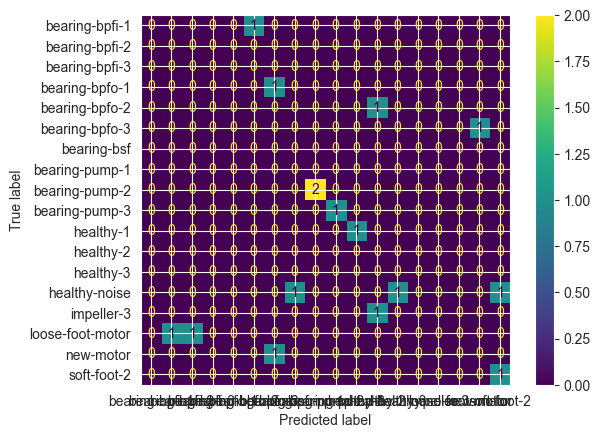

In [12]:
X=df.drop(['num','file_name','motor_type','measurement_type',	'percentage_rated_speed','failure_mode','channels'],axis=1)
y=df['failure_mode']
# we always want to work with a training, validation and test data set
from sklearn.model_selection import train_test_split
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
pred = model.predict(X_validation)
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_validation, pred)
print ('accuracy is :',accuracy_score(y_validation, pred))

0) Look at your last attempt at predicting the failure mode. <br>
1) Add PCA as a preprocessing method.<br>
2) Compare the results!


In [13]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# PCA preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# print pca components
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("PCA components:\n", pca.components_)

Explained variance ratio: [0.28150971 0.09703511 0.05290224]
PCA components:
 [[ 0.00320722  0.03898658  0.00709779 -0.00855663 -0.026805    0.06347292
   0.13909587  0.13469174  0.13041414  0.14627054  0.17102086  0.16941643
   0.16367009  0.15323374  0.10716468  0.11943189  0.16357784  0.18474466
   0.17346495  0.20539353  0.20354468  0.19514986  0.18166591  0.18574386
   0.17386937  0.19415599  0.18749297  0.13443492  0.09465938  0.11677548
   0.10825539  0.11272288  0.03449834 -0.00100979  0.05228873  0.11923625
   0.14511005  0.13576348  0.16593426  0.10884953  0.12774364  0.11718692
   0.17249705  0.19435477  0.20149016  0.14199015  0.11447313  0.12083637
   0.15044609  0.17230388]
 [-0.00080822  0.02215994  0.06985217  0.01626326 -0.01208414 -0.07269471
  -0.12627629 -0.12198017 -0.19217949 -0.18635182 -0.21889295 -0.11566989
  -0.14310468 -0.05400558 -0.07726741 -0.08551558 -0.15033433 -0.13723937
  -0.10443961 -0.11516036 -0.13036795 -0.06551752 -0.11634657 -0.11484355
  -0.10

In [15]:
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)

In [17]:
#hyperparameter tuning of n_estimators
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_validation, y_validation)
print("Best parameters found: ", grid_search.best_params_)


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [8]:
# Use PVC
model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'])
model.fit(X_train, y_train)
pred = model.predict(X_validation)

# accuracy
print('accuracy is :',accuracy_score(y_validation, pred))


accuracy is : 0.3125


The accuracy is a little better but still nowhere near good. <br>